# Visualizing Class Imbalance
Agriculture datasets are often imbalanced (e.g., thousands of "Common Rust" but only a few "Southern Rust"). If we don't visualize this, the model might simply learn to guess the most common disease and ignore the rare ones.

/var/folders/h4/qx7nkz751x9gd4p_2j2nsv540000gn/T/ipykernel_8629/523052948.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disease_counts.values, y=disease_counts.index, palette='viridis')


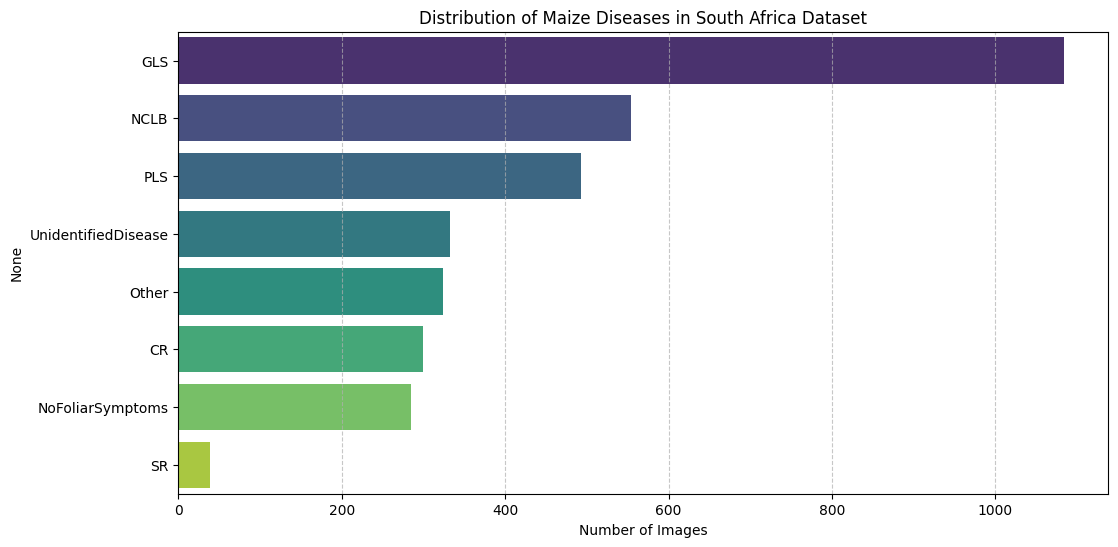

Diseases per image distribution:
1    1464
2     742
3     134
4      14
5       1
Name: count, dtype: int64
label (GLS) - 1084
label (NCLB) - 554
label (PLS) - 493
label (UnidentifiedDisease) - 332
label (Other) - 324
label (CR) - 300
label (NoFoliarSymptoms) - 285
label (SR) - 39


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the database
df = pd.read_csv('../data/Database.csv')

# 2. Define the label columns present in your CSV
labels = ['GLS', 'NCLB', 'PLS', 'CR', 'SR', 'NoFoliarSymptoms', 'Other', 'UnidentifiedDisease']

# 3. Calculate the distribution of diseases
disease_counts = df[labels].sum().sort_values(ascending=False)

# 4. Visualize the findings
plt.figure(figsize=(12, 6))
sns.barplot(x=disease_counts.values, y=disease_counts.index, palette='viridis')
plt.title('Distribution of Maize Diseases in South Africa Dataset')
plt.xlabel('Number of Images')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 5. Check for multi-label overlap (how many diseases per leaf)
overlap = df[labels].sum(axis=1).value_counts().sort_index()
print("Diseases per image distribution:")
print(overlap)

# 6. Check how many images there are of each class
for label, count in disease_counts.items():
    print(f"label ({label}) - {count}")

# Insights (Exploratory Data Analysis)
After analyzing the data with the corrected script, here are the critical "Industry Insights" we need to address before moving to the model:

### Extreme Class Imbalance:

- GLS (Grey Leaf Spot) is very dominant (1,084 images).

- SR (Southern Rust) is extremely rare (only 39 images).

- **MLOps Impact**: A standard model might fail to ever "learn" what Southern Rust looks like. We will likely need to use Weighted Loss or heavy augmentation for this class.

### Significant Multi-Label Presence:

- About 37% of your images (891 total) have more than one disease.

- **MLOps Impact**: We cannot use a simple "Softmax" at the end of our model. We must use a Sigmoid activation and Binary Cross Entropy (BCE) loss so the model can predict multiple diseases for one leaf.

### "Other" and "Unidentified":

- Combined, these make up ~650 images. These are important for an offline app so the farmer gets an "Unknown" warning rather than a wrong diagnosis.